EE 445 Machine Learning Project #1 | Author: Spencer Kerkau

Project: WiDS Datathon 2024 - Predicting likelihood of patient diagnosis periods being less than 90 days for breast cancer

1. Explanation of approach such as why I picked a specific algorithm.

    Before starting any work on the project, my first step was examining the provided documentation, training data, and the requirements/desired output. Because the type of output is whether or not a patient was provided a diagnosis within 90 days, this is a binary output meaning we can categorize the output into 2 classes. This immediately alerted myself that this would be a binary classification problem. Since the provided training data has a large amount of features as well as a probability of a 'Yes' diagnosis being required along side the output, I decided to use logistic regression. Logisitc regression can be used to find the probability of a 'Yes' diagnosis. The probabilty of the diagnosis can then be compared with a thresholder to make a final decision on whether they did or did not get the diagnosis within 90 days. In this case, the thresholder was set to 0.5 since there are only two classes.

    Besides the reasons above, I also had a personal preference to logisitc regression due to the familiarity of it being heavily covered during class lectures and the ease of access to documentation in the lecture slides and textbook in the event I get stuck. 

2. Explain any/all choices of hyperparameters.

    Throughout my code, the only hyperparameters that were manually chosen were the type of solver for linear regression as well as the associated penalty. I decided to use the 'lbfgs' solver with the l2 regularization penalty as the scikit libary stated that 'lbfgs' is strong for when dealing with relatively small datasets. The scikit library only allows for l2 regularization with 'lbfgs' but allows for other penalties such as l1 and elasticnet if other solvers are chosen. 

    The only other areas that involved hyperparameters was the ratio to split the training and test set. I decided to use the default 80% training set and 20% testing based off previous discussions during lecture.


3. What type of data preprocessing did I do?

    While looking through the provided training data, one of my initial steps was deciding which features were relevant to be included into the model. The feature list can be found below.

    Feature List: 'patient_id', 'patient_age', 'breast_cancer_diagnosis_code', 'family_size', 'income_household_median','home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree', 'labor_force_participation', 'unemployment_rate', 'race_white', 'race_black', 'race_asian', 'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled', 'limited_english', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02', 'DiagPeriodL90D'

    The first filter in deciding which features would be included to the list was the amount of missing data. If a feature was found to have significant amount of missing or undefined data, then it was decided to not include the feature as the missing data would have to be interpolated/averaged in some method which could lead to biasing the training data set. An example of this is with bmi. Bmi would be a significant contributor to predicting the diagnosis period but since a large majority of the training data has 'NaN' for the bmi , it would not be beneficial to the model. Another filter to the feature list was the relevancy of the features. Basic searches were done on each of the features to decide if there was a relevant correlation to cancer or cancer diagnoses. If no real correlation could be found, then it was decided to obmit the feature. Finally, repetitive features such as the breast_cancer_diagnosis_desc was obmitted as the description is hard to quantify for the model as well as the vast majority of training data points having the exact same description.

4. How did I deal with any missing data?

    After narrowing down the feature list, each training data was passed through an additional filter. This additional filter converted all feature values for each training data point to integers. If a training data did not have integer feature values, then the training data point as a whole was dropped. By approaching missing data in this method, a minimal amount of training data was removed. It was decided that this would be a more desirable outcome as opposed to interpolating values for the missing data as this prevents heavily biasing the training data set as a whole.

In [1]:
### LOADING, CLEANING, AND SPLITTING THE DATASET ### 

# Imported Libraries for splitting data, pandas for loading data, and numpy for basic math
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib as plt

# Read in data from the csv file
Data_File_Path = '/Users/spencerkerkau/Desktop/Coding Projects/EE 445/Project 1/class_train.csv'
Patient_Master_csv = pd.read_csv(Data_File_Path)

# Create a list holding all the desired feature values from the training data set
Feature_Data = Patient_Master_csv[['patient_id', 'patient_age', 'breast_cancer_diagnosis_code', 'family_size', 'income_household_median',
                                   'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
                                   'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above',
                                   'education_stem_degree', 'labor_force_participation', 'unemployment_rate', 'race_white', 'race_black', 'race_asian', 
                                   'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled', 'limited_english', 'health_uninsured', 
                                   'veteran', 'Ozone', 'PM25', 'N02', 'DiagPeriodL90D']].copy()

# Go through all the training data, convert the selected features to integers, and drop the training data with non integer values
for Feature in Feature_Data:
    # Converts all feature values for each training data point to integers
    Feature_Data[Feature] = pd.to_numeric(Feature_Data[Feature], errors='coerce')
    # Drops all training data with non integer feature values
    Feature_Data.dropna(subset=[Feature], inplace=True)

# Test print to confirm the data looks ok
#print(Feature_Data)
    
# Selecting the features from the feature_data list
Features = ['patient_id', 'patient_age', 'breast_cancer_diagnosis_code', 'family_size', 'income_household_median',
                                   'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
                                   'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above',
                                   'education_stem_degree', 'labor_force_participation', 'unemployment_rate', 'race_white', 'race_black', 'race_asian', 
                                   'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled', 'limited_english', 'health_uninsured', 
                                   'veteran', 'Ozone', 'PM25', 'N02']

# Selecting the target from the feature_data list
Target = 'DiagPeriodL90D'

# Split the feature and target values
X = Feature_Data[Features]
y = Feature_Data[Target]

# Split the dataset into training set and test set with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Training Accuracy: 51.100% | Cross Entropy Training Error: 48.900% 
Testing Accuracy: 49.579% | Cross Entropy Testing Error: 50.421% 


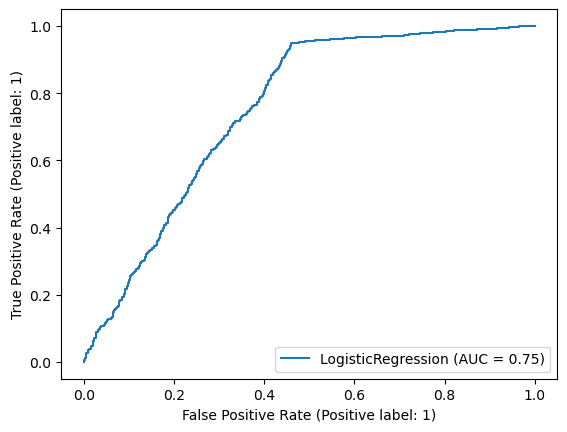

In [2]:
### FITTING DATA AND CALLING THE LOGISTIC FUNCTION ### 

# Import scikitlearn library for the logistic regression function, mean squared error loss function, and ROC curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, RocCurveDisplay

# Preset the logsitic regression function
logisticRegr = LogisticRegression(solver='lbfgs', max_iter = 250)

# Fit the logistic function using the training data found by splitting the entire set into a training and test set
logisticRegr.fit(X_train, y_train)

# Find the probabilities of a diagnosis within the next 90 days for the training and test
y_train_probabilities = logisticRegr.predict_proba(X_train)
y_test_probabilities = logisticRegr.predict_proba(X_test)

# Predict whether the patient received a diagnosis within the next 90 days. Can also be done by comparing the prediction probability
# to a threshold of 0.5 but the inbuilt predict function does this for us. Call the function for convenience.
y_train_predict = logisticRegr.predict(X_train)
y_test_predict = logisticRegr.predict(X_test)

# Create a dataframe to store the probabiltity of diagnosis in the next 90 days for each patient
Patient_Prediction_DF = pd.DataFrame(columns = ['patient_id', 'DiagPeriodL90D'])

# Set two index values
DF_Idx = 0
X_Idx = 0

# Loop through the entire test set and assign the probability for each patient according to their patient id
for patient_id in X_test['patient_id']:
    Patient_Prediction_DF.loc[DF_Idx] = [patient_id, y_test_probabilities[X_Idx][1]]
    DF_Idx += 1
    X_Idx += 1

# Test print to verify the dataframe is properly storing the patient id and associated diagnosis probability
#print(Patient_Prediction_DF)

# Calculate training and testing error using the log_loss/cross-entropy loss.
Training_Error = log_loss(y_train, y_train_probabilities)
Testing_Error = log_loss(y_test, y_test_probabilities)

print('Training Accuracy: %.3f%% | Cross Entropy Training Error: %.3f%% ' % ((1-Training_Error)*100, Training_Error*100))
print('Testing Accuracy: %.3f%% | Cross Entropy Testing Error: %.3f%% ' % ((1-Testing_Error)*100, Testing_Error*100))

# Create csv file for submission
#Patient_Prediction_DF.to_csv('/Users/spencerkerkau/Desktop/Coding Projects/EE 445/Project 1/kerkaus_submission.csv', index=False)

# Plot the ROC Curve given the training and testin data
RocCurveDisplay.from_estimator(logisticRegr.fit(X_train, y_train), X_test, y_test)


Due to relatively low accuracy, I decided to reevaluate the model using Kfolding and the logistic function. The resulting accuracy from using kfolding was about 81%. The accuracy was found by taking the error of every batch and averaging out the value to get 81%. After performing kfolding, we can see that the found accuracy from kfolding and standard dataset splitting results in roughly a 30%  difference. The source of this difference may be due to the error equation used in the scikit "cross_val_score". In previous iterations of the code, I initially used mean squared error to evaluate my logisitc model and received very similar error found using kfolding. After switching from mean squared error to cross entropy, the 30% difference in accuracy occurred between the two methods. This leads me to believe that the cross_val_score may not be the strongest indicator of performance despite kfolding being a relevant source of verifying the model.  

In [3]:
### Reevaluating the model due to low accuracy ###

# Imported libraries to varify model using k folding
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Split entire data set into 10 batches
kFold = KFold(n_splits = 10, random_state = 0, shuffle = True)

# Set the model to logistic regression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter = 250)

# Compute the cross validation score using the k folded data set and the logistic regression function
results = cross_val_score(logisticRegr, X, y, cv = kFold)

# Calculate the accuarcy and error of the entire data set by taking the mean of all the batches
print('Overall Accuracy: %.3f%% | Error: %.3f%%' % (results.mean()*100, 100 - results.mean()*100))


Overall Accuracy: 80.928% | Error: 19.072%


Overall results and comments

After building and verifying the model, we can see that logistic regression produced a 51% accuracy on the training set and a 49.5% accuracy for the test set. The model was built by manually choosing relevant features from the entire data set, cleaning the data by removing any missing values/undefined/invalid values, and performing a 80/20 split for a training and test set. The model of choice was logisitc regression due to the natural requirements of the project being binary classification as well as the ease of getting the probabilities of each patient receiving a diagnosis within the next 90 days. Logistic regression was also a heavily covered topic during lectures and within the textbook proving ease of access to notes and comfort with the topic. The choice of error function was the log_loss or cross entropy function as mean sqaured error would not be the wisest choice for various reasons such as the data not being gaussian. Kfolding was also used in an attempt to varify the results but the accuracy found was significantly different (30% difference) in comparrison to the original result. As such, we cannot fully rely on the output of using kfolding with logisitic regression in this specific case.

A ROC curve was also produced as it is a common tool to visualize the results of the model. From the ROC curve above, we can see a AUC score of 0.75 indicating that the model is neither strong or poor at predicting the output.